In [1]:
#importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="deep")

In [2]:
dataSeries=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Series/674388_1186156_bundle_archive/tv_shows.csv")

In [3]:
dataSeries

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [4]:
#Making deep copies
dataS1=dataSeries.copy(deep=True)

In [5]:
#Naming the 1st column as Sno and making it as index column
dataS1=dataS1.rename(columns={"Unnamed: 0":"Sno"})

In [6]:
dataS1=dataS1.set_index("Sno")

In [7]:
dataS1

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
Sno,,,,,,,,,,
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1


# General Informations

In [8]:
dataS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5611 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
 9   type             5611 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 482.2+ KB


In [9]:
dataS1.shape

(5611, 10)

In [10]:
dataS1.isnull().sum()

Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [11]:
dataS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5611 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
 9   type             5611 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 482.2+ KB


In [12]:
dataS1.Year.unique()

array([2008, 2016, 2017, 2010, 2015, 2005, 2011, 2013, 2009, 2006, 2019,
       1990, 2014, 2018, 2007, 2003, 2020, 1999, 2012, 1959, 1987, 1966,
       2000, 1995, 1969, 2002, 1998, 1993, 1988, 2004, 1984, 1992, 1996,
       1997, 1982, 2001, 1986, 1960, 1974, 1989, 1985, 1968, 1983, 1972,
       1994, 1981, 1961, 1914, 1973, 1991, 1975, 1951, 1963, 1955, 1978,
       1971, 1964, 1970, 1934, 1958, 1962, 1976, 1965, 1967, 1954, 1980,
       1947, 1950, 1977, 1931, 1979, 1952, 1957, 1948, 1956, 1949, 1901,
       1904, 1932, 1943, 1945], dtype=int64)

In [13]:
dataS1.Age.unique()

array(['18+', '16+', '7+', nan, 'all', '13+'], dtype=object)

# General Exploration

In [14]:
dataS1

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
Sno,,,,,,,,,,
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1


##### Let's see how many shows were released in each years

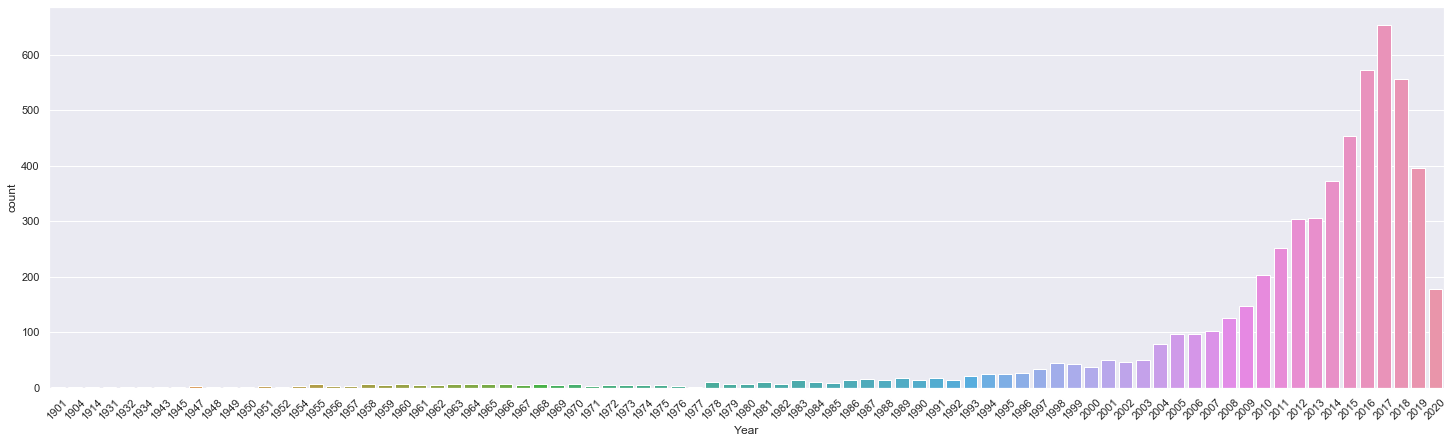

In [15]:
plt.figure(figsize=(25,7))
sns.countplot(dataS1['Year'])
plt.xticks(rotation=45)
plt.show()

We see that during the year 2017, most of the tv series were released

#### There are many punctuation and extra characters in the name of the series, so now we will be doing some cleaning

In [16]:
import nltk
import string

In [17]:
# creating a function that will remove all the punctuations
def remove_punctuations(txt):
    text_nopunct="".join([i for i in txt if i not in string.punctuation])
    return text_nopunct

In [18]:
# we will create a new column with shows name with no punctuations
dataS1['Title_nopunt']=dataS1['Title'].apply(lambda x: remove_punctuations(x))
dataS1['Title_nopunt']=dataS1['Title_nopunt'].str.lower()

In [19]:
dataS1.tail()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title_nopunt
Sno,,,,,,,,,,,
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1,tuts treasures hidden secrets
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1,paradise islands
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1,wild russia
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1,love vets
5610,United States of Animals,2016,NaN,NaN,NaN,0,0,0,1,1,united states of animals


We can see that many shows don't have Age, IMDb, Rotten Tomatoes values, but we can't drop them since droping them will cause many shows to be removed from the dataset

For replacing them, as per my knowledge, these columns can't be filled by any sort of values because it may result in wrong interpretation.

Example, if we replace NaN values of Age column with let's say 7+, but actually many shows won't be 7+, this will lead to mist interpretation

##### Lets see all the shows rating of IMDb of all the shows present in Netflix 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

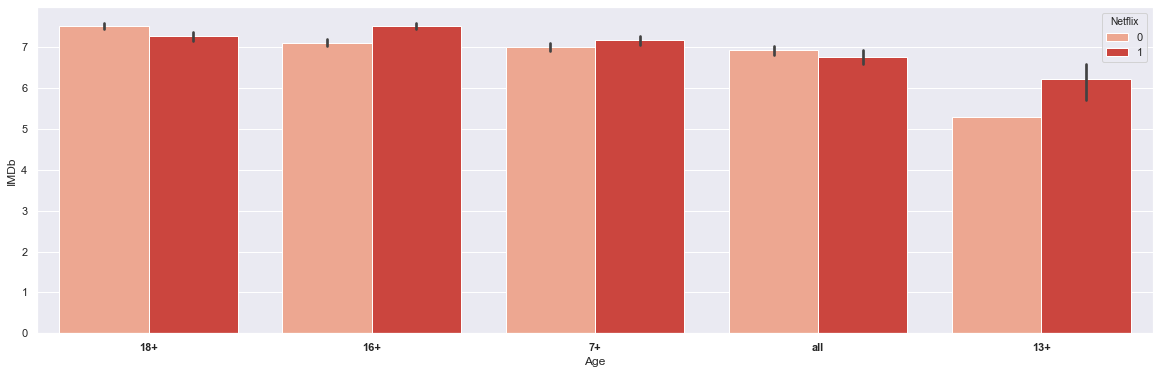

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age', y='IMDb', hue='Netflix', data=dataS1, palette='Reds')
plt.xticks(fontweight='bold')

##### lets do the same for prime video, hulu and disney+

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

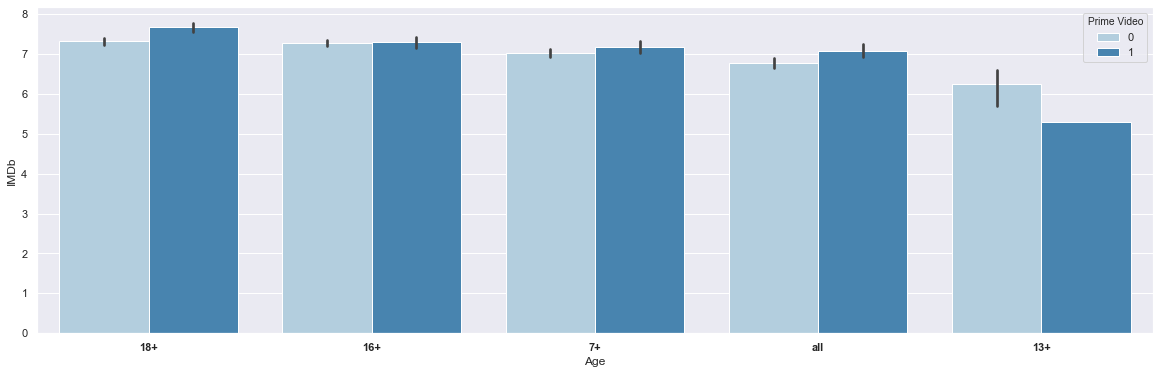

In [21]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age', y='IMDb', hue='Prime Video', data=dataS1, palette='Blues')
plt.xticks(fontweight='bold')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

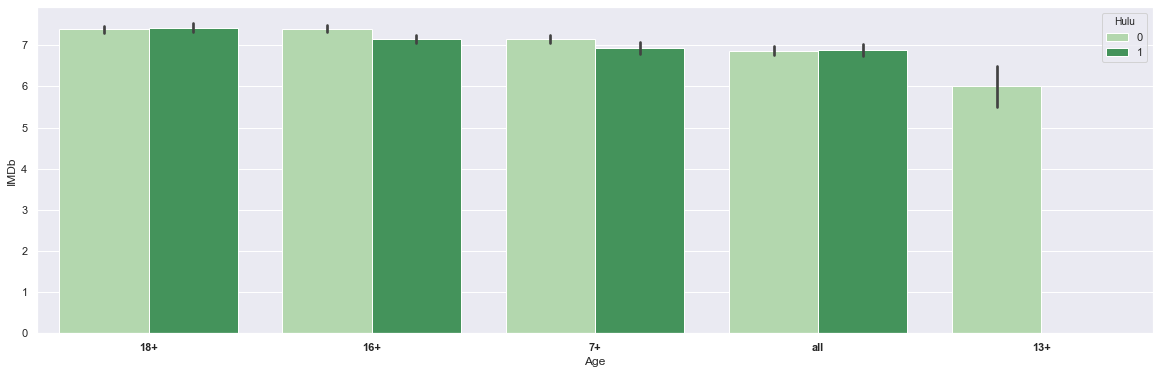

In [22]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age', y='IMDb', hue='Hulu', data=dataS1, palette='Greens')
plt.xticks(fontweight='bold')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

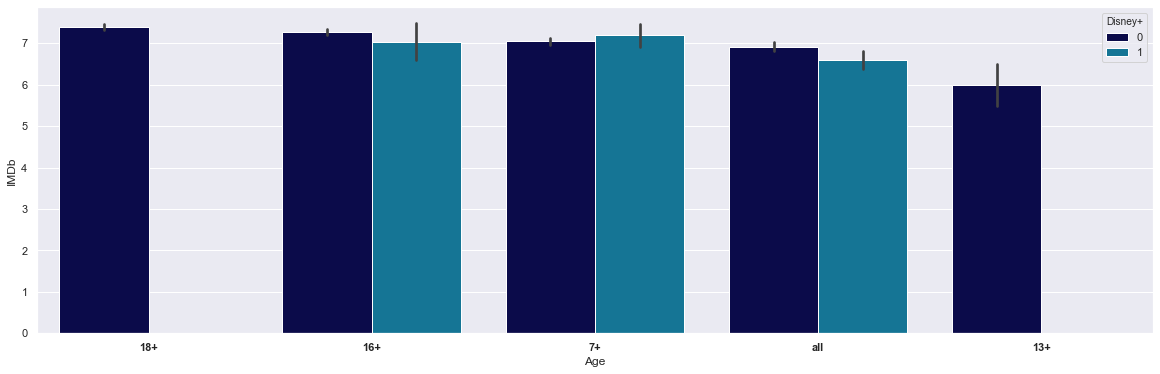

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age', y='IMDb', hue='Disney+', data=dataS1, palette='ocean')
plt.xticks(fontweight='bold')

I tried to color the bars with those colors which are used by their actual names, like red in netflix, green in hulu and all...

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


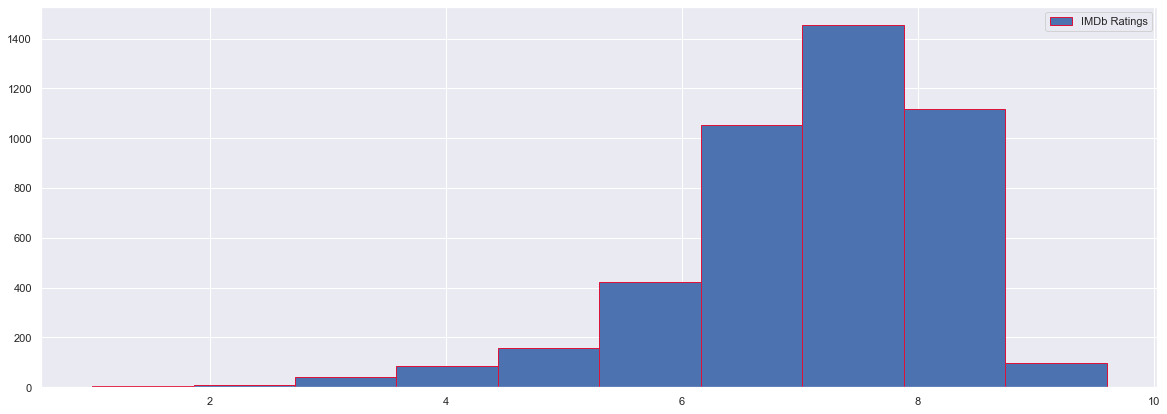

In [24]:
plt.figure(figsize=(20,7))
plt.hist(dataS1['IMDb'],edgecolor='#DC143C', label="IMDb Ratings")
plt.legend()
plt.show()

We can interpret that most of the shows have ratings b/w 6.5 to 8.5

##### As we can see in Rotten Tomatoes rating are in %, which we are going to change in decimal form same as IMDb

In [25]:
dataS1['Rotten Tomatoes']=dataS1['Rotten Tomatoes'].str.replace("%","")

In [26]:
dataS1['Rotten Tomatoes']=dataS1['Rotten Tomatoes'].astype(float)

In [27]:
dataS1['Rotten Tomatoes']=dataS1['Rotten Tomatoes']/10

In [28]:
dataS1

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title_nopunt
Sno,,,,,,,,,,,
0,Breaking Bad,2008,18+,9.5,9.6,1,0,0,0,1,breaking bad
1,Stranger Things,2016,16+,8.8,9.3,1,0,0,0,1,stranger things
2,Money Heist,2017,18+,8.4,9.1,1,0,0,0,1,money heist
3,Sherlock,2010,16+,9.1,7.8,1,0,0,0,1,sherlock
4,Better Call Saul,2015,18+,8.7,9.7,1,0,0,0,1,better call saul
...,...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1,tuts treasures hidden secrets
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1,paradise islands
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1,wild russia


C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


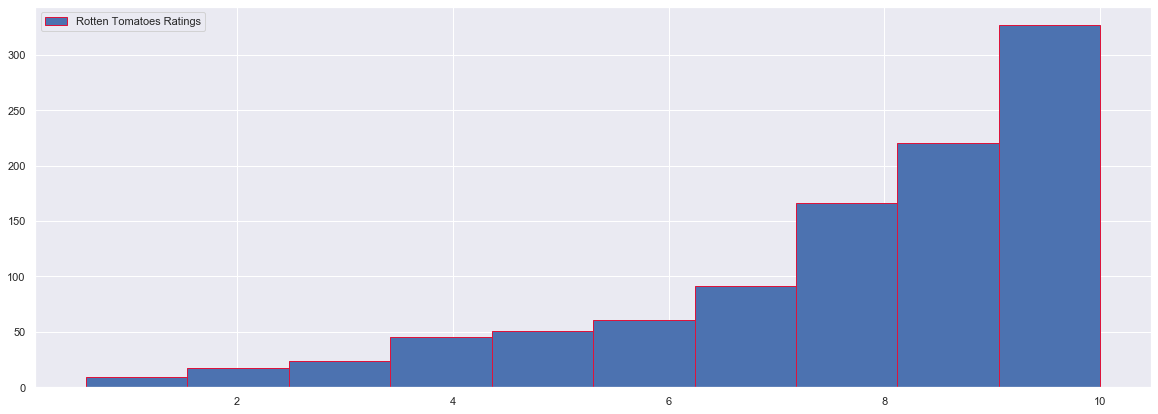

In [29]:
plt.figure(figsize=(20,7))
plt.hist(dataS1['Rotten Tomatoes'],edgecolor='#DC143C', label="Rotten Tomatoes Ratings")
plt.legend()
plt.show()

We can see that, many of the shows got good rating. and aroud 350 or so had ratings b/w 9-10

# Recommendation System

### Let's try making a recommendation system based on users input:
#### User will input the Name of a series/a group of series
#### we will get its information like Age, IMDb rating, and its availablity on the platform
#### with this gather data, we will try to recommend the user smiliar shows he/she can watch

In [36]:
def recommend_more(df,namesoftheshows):
    #print(namesoftheshows)
    datasub=df.loc[df['Title_nopunt'].isin(namesoftheshows)] #the one with the namesoftheshows
    #print(datasub)
    datanew=df.loc[~df['Title_nopunt'].isin(namesoftheshows)] # the one without the namesoftheshows, and from where the recommendation will come
    datasub=datasub.drop(['Title'],axis=1)
    datanew=datanew.drop(['Title'],axis=1)
    print(datanew.head())
    # now we will make a new dataframe, with Age as base we got from previous df
    listage=list(datasub['Age'])
    #print(listage)
    datanew=datanew.loc[datanew['Age'].isin(listage)] #This one contains only those shows who's age matches with the age of namesoftheshows
    listIMDb=np.array(datasub['IMDb']) #this for multiplication purpose
    print(len(listIMDb))
    
    
    """making dummies"""
    datadummysub=pd.get_dummies(datasub['Age'])
    #print(datadummysub)
    datasub=pd.concat([datasub,datadummysub], axis=1)
    datadummynew=pd.get_dummies(datanew['Age'])
    datanew=pd.concat([datanew, datadummynew], axis=1)
    #datadummysubnetflix=pd.get_dummies(datasub['Netflix'])
    #print(datadummysubnetflix)
    
    """From this point on we are trying to make a normalized user weighted matrix given from his choice of shows"""
    #making weighted matrix for datasub which will be multiplied by listIMDb
    datasub1=datasub.drop(['Year','Age','IMDb','Rotten Tomatoes','type','Title_nopunt'], axis=1)
    #print(datasub1)
    listIMDb=listIMDb.reshape(len(listage),1) #reshaping the matrix so that it could be multiplied
    #print(listIMDb)
    print("\n\n",listIMDb.shape,"\n\n")
    datanum=np.array(datasub1) #changing our datasub into numpy array so that we can multiply listIMDb
    #print(datanum)
    weighted_array=np.multiply(listIMDb,datanum) #making our weighted array
    #print(weighted_array)
    #now making a user weighted matrix
    user_weighted_matrix=np.sum(weighted_array, axis=0) #using np.sum() so as to get column wise sum
    #print(user_weighted_matrix)
    #now making a normalized user weighted matrix
    norm_user_weighted_matrix=user_weighted_matrix/sum(user_weighted_matrix) 
    #print(norm_user_weighted_matrix)
    
    """The previous step is done"""
    
    """Now by using the norm_user_weighted_matrix, we will try to recommend the user a list to shows"""
    datanew1=datanew.drop(['Year','Age','IMDb','Rotten Tomatoes','type','Title_nopunt'], axis=1)
    #print(datanew1)
    datanum1=np.array(datanew1) #this is our candidate matrix
    #print(datanum1)
    weighted_candidate_matrix=np.multiply(norm_user_weighted_matrix,datanum1) #now making weighted candidate matrix
    #print(weighted_candidate_matrix)
    recommendation_candidate_matrix=np.sum(weighted_candidate_matrix, axis=1)
    #print(aggregated_weighted_candidate_matrix)
    #recommendation_candidate_matrix=recommendation_candidate_matrix.reshape(-1,1) **** no need to reshape, that's why commented out
    #print(recommendation_candidate_matrix)
    
    """Now since we got the recommendation matrix, now we will merge the matrix as a column in the datanew matrix"""
    datanew['recommendation_rating']=pd.Series(recommendation_candidate_matrix)
    print(datanew.head())
    datanew=datanew.sort_values('recommendation_rating',ascending=False)
    print(datanew.head())
    print(datanew[['Title_nopunt','recommendation_rating']].head(10))

In [37]:
recommend_more(dataS1,['breaking bad','stranger things', 'the flash', 'one punch man', 'the twilight zone', 'once upon a time'])

     Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
Sno                                                                          
2    2017  18+   8.4              9.1        1     0            0        0   
3    2010  16+   9.1              7.8        1     0            0        0   
4    2015  18+   8.7              9.7        1     0            0        0   
5    2005  16+   8.9              8.1        1     0            0        0   
6    2011  18+   8.8              8.3        1     0            0        0   

     type      Title_nopunt  
Sno                          
2       1       money heist  
3       1          sherlock  
4       1  better call saul  
5       1        the office  
6       1      black mirror  
5


 (5, 1) 


     Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
Sno                                                                          
2    2017  18+   8.4              9.1        1     0            0       